<a href="https://colab.research.google.com/github/Pynthamil/The-Hunger-Games-The-Google-Edition/blob/main/Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install joypy

In [3]:
!pip install pytrends

In [4]:
#import necessary libraries
import pandas as pd
import numpy as np
import joypy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [29]:
sns.set_theme(style="whitegrid", palette="summer")

In [6]:
from pytrends.request import TrendReq

pytrends = TrendReq()
pytrends.build_payload(["social media", "smartphone", "cloud computing", "streaming", "AI"],
                       timeframe="2004-01-01 2023-12-31"
                       )

trends = pytrends.interest_over_time()
trends = trends.drop(columns=["isPartial"])

In [7]:
trends.head()

,social media,smartphone,cloud computing,streaming,AI
date,,,,,
2004-01-01,0,2,0,8,7
2004-02-01,0,2,0,8,7
2004-03-01,0,2,0,8,7
2004-04-01,0,2,0,8,7
2004-05-01,0,2,0,7,7


In [8]:
trends.tail()

,social media,smartphone,cloud computing,streaming,AI
date,,,,,
2023-08-01,6,4,1,30,76
2023-09-01,7,4,1,32,77
2023-10-01,7,4,1,31,88
2023-11-01,7,4,1,31,91
2023-12-01,6,4,1,32,90


In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nharshavardhana/killed-by-google-google-graveyard")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'killed-by-google-google-graveyard' dataset.
Path to dataset files: /kaggle/input/killed-by-google-google-graveyard


In [12]:
#data preparation
#1. Loading dataset
df = pd.read_csv("/kaggle/input/killed-by-google-google-graveyard/Google_graveyard.csv")

In [13]:
#take a look at the data
df.head()

,SLNO,Name,Description,Category,Start,End,Duration,Total years
0,1,Google Optimize,Google Optimize was a web analytics and testin...,Service,2012,2023,2012 - 2023,11
1,2,Google Cloud IoT Core,Google Cloud IoT Core was a managed service de...,Service,2019,2023,2019 - 2023,4
2,3,Grasshopper,Grasshopper was a free mobile and web app for ...,App,2019,2023,2019 - 2023,4
3,4,Conversational Actions,Conversational Actions extended the functional...,Service,2018,2023,2018 - 2023,5
4,5,Google Currents (2019),Google Currents was a service that provided so...,Service,2019,2023,2019 - 2023,4


In [14]:
df.tail()

,SLNO,Name,Description,Category,Start,End,Duration,Total years
280,281,Google Video Marketplace,Google Video Marketplace was a service that in...,Service,2006,2007,2006 - 2007,1
281,282,Google Answers,Google Answers was an online knowledge market.,Service,2002,2006,2002 - 2006,4
282,283,Writely,Writely was a Web-based word processor.,Service,2005,2006,2005 - 2006,1
283,284,Google Public Service Search,Google Public Service Search provided governme...,Service,2002,2006,2002 - 2006,4
284,285,Google Deskbar,Google Deskbar was a small inset window on the...,Service,2003,2006,2003 - 2006,3


In [15]:
#list the number of rows and columns
rows, columns = df.shape

print("The rows are: ", rows)
print("The columns are: ", columns)

The rows are:  285
The columns are:  8


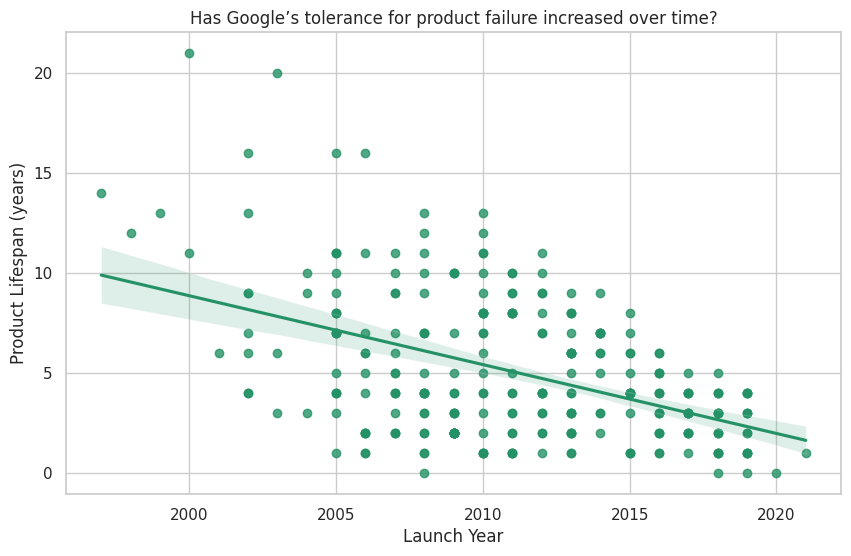

In [30]:
#checking the launch year vs lifespan
plt.figure(figsize=(10,6))

sns.regplot(
    data=df,
    x="Start",
    y="Total years",
)

plt.title("Has Google’s tolerance for product failure increased over time?")
plt.xlabel("Launch Year")
plt.ylabel("Product Lifespan (years)")

plt.show()

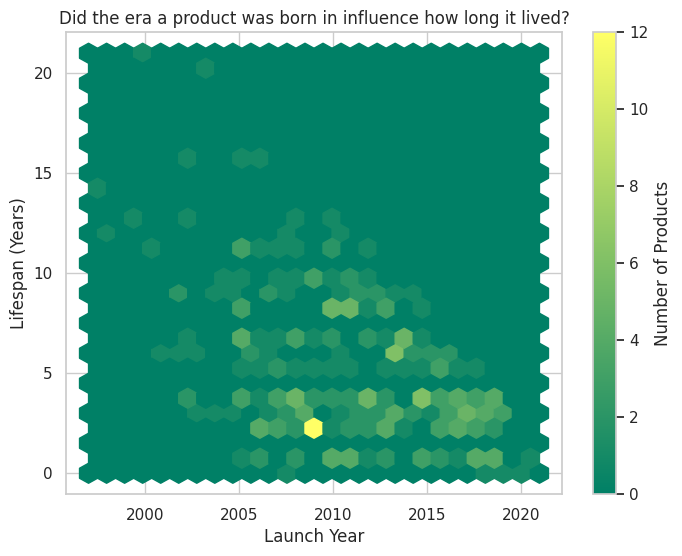

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.hexbin(
    df["Start"],
    df["Total years"],
    cmap="summer",
    gridsize=25,
)

plt.colorbar(label="Number of Products")

plt.xlabel("Launch Year")
plt.ylabel("Lifespan (Years)")
plt.title("Did the era a product was born in influence how long it lived?")
plt.show()


<Figure size 1000x600 with 0 Axes>

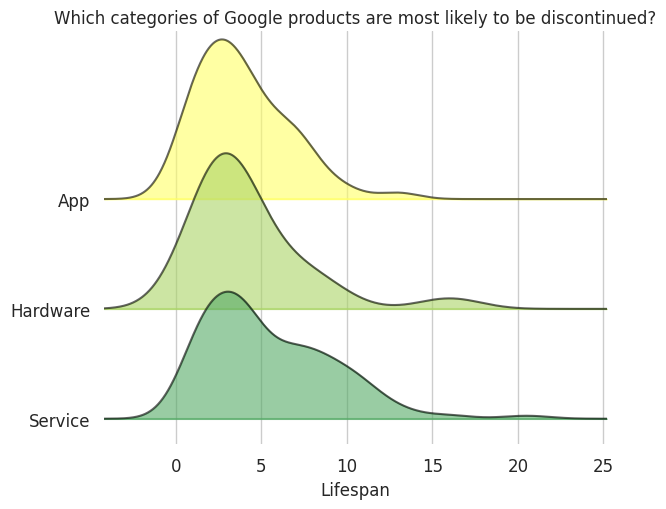

In [32]:
# Distribution of Total Years (Lifespans) by Category
plt.figure(figsize=(10, 6))

joypy.joyplot(
    data=df,
    column='Total years',
    by='Category',
    colormap=plt.cm.summer_r,
    alpha=0.6
)

plt.title('Which categories of Google products are most likely to be discontinued?')
plt.xlabel('Lifespan')
plt.ylabel('Density')
plt.grid(True)
plt.show()

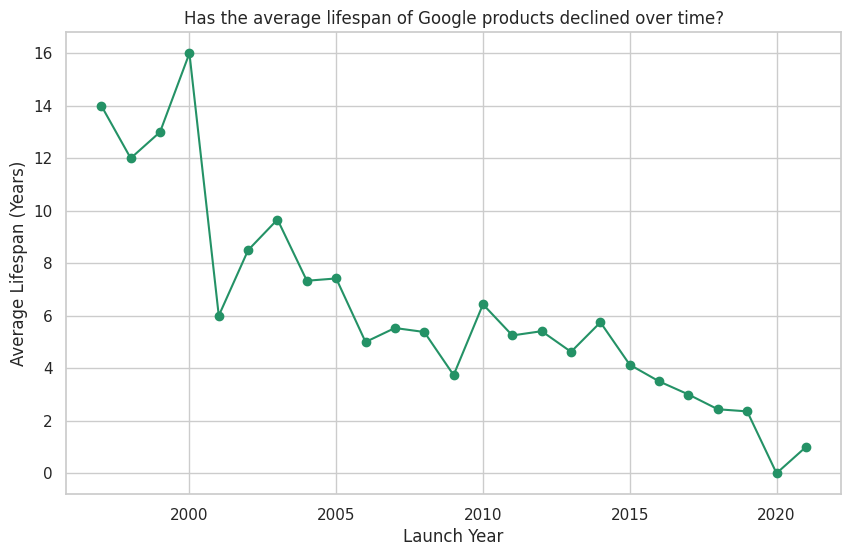

In [33]:
# Average Google Product Lifespan by Launch Year

avg_lifespan = df.groupby("Start")["Total years"].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(
    avg_lifespan["Start"],
    avg_lifespan["Total years"],
    marker="o"
)
plt.title("Has the average lifespan of Google products declined over time?")
plt.xlabel("Launch Year")
plt.ylabel("Average Lifespan (Years)")
plt.grid(True)

plt.show()

In [34]:
category_counts = df['Category'].value_counts()
category_counts

,count
Category,
Service,206
App,57
Hardware,22


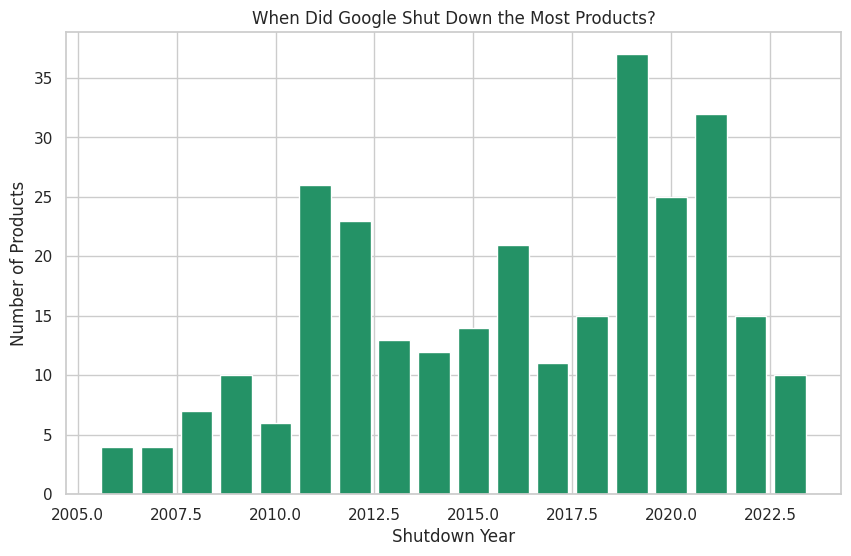

In [35]:
shutdowns = df["End"].value_counts().sort_index()

plt.figure(figsize=(10, 6))

plt.bar(shutdowns.index, shutdowns.values)

plt.title("When Did Google Shut Down the Most Products?")
plt.xlabel("Shutdown Year")
plt.ylabel("Number of Products")

plt.show()

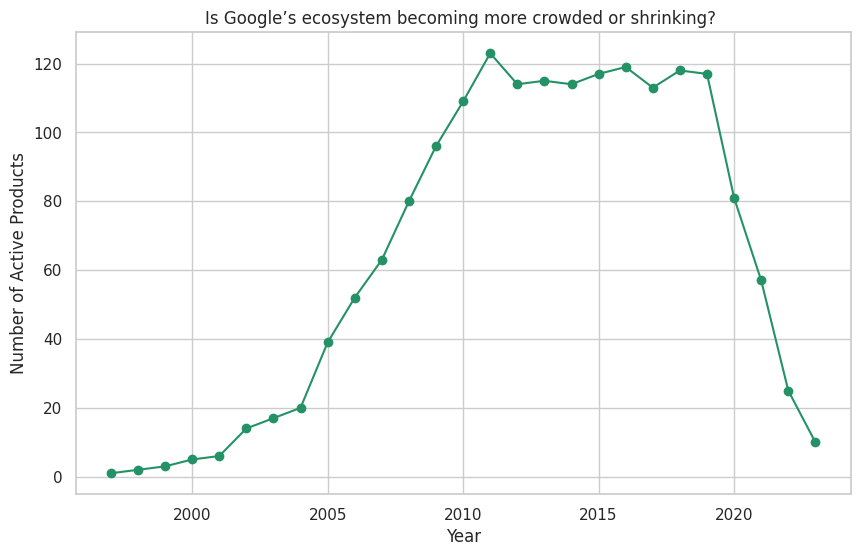

In [36]:
years = range(df["Start"].min(), df["End"].max() + 1)
active_products_per_year = []

for year in years:
    active_products = df[(df["Start"] <= year) & (df["End"] >= year)]
    active_products_per_year.append(len(active_products))

plt.figure(figsize=(10, 6))
plt.plot(years, active_products_per_year, marker='o')
plt.title("Is Google’s ecosystem becoming more crowded or shrinking? ")
plt.xlabel("Year")
plt.ylabel("Number of Active Products")
plt.grid(True)
plt.show()

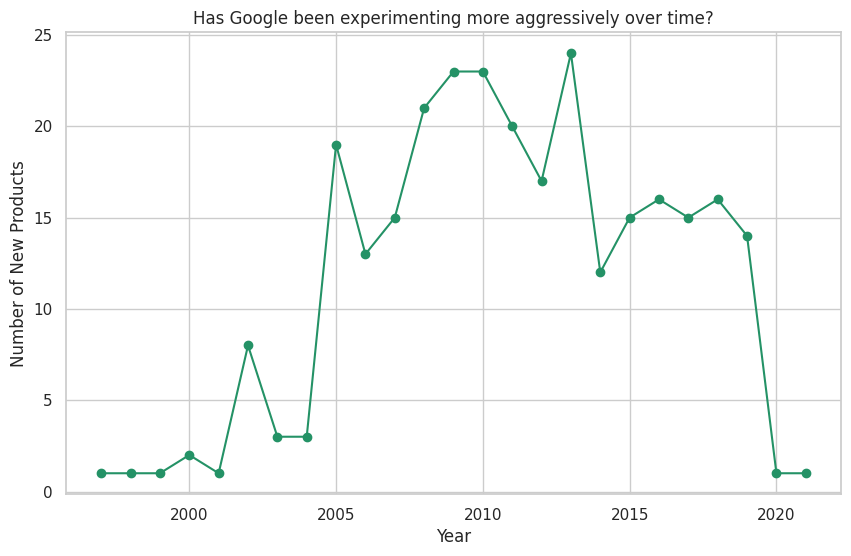

In [37]:
# Google Product Launches Over Time

launch_counts = df["Start"].value_counts().sort_index()

plt.figure(figsize=(10,6))

plt.plot(
    launch_counts.index,
    launch_counts.values,
    marker="o"
)

plt.title("Has Google been experimenting more aggressively over time?")
plt.xlabel("Year")
plt.ylabel("Number of New Products")
plt.grid(True)

plt.show()

In [38]:
# Count Trends per Year
trends["year"] = trends.index.year

trends_yearly = (
    trends.groupby("year")
    .mean()
    .reset_index()
)

trends_yearly.head()

,year,social media,smartphone,cloud computing,streaming,AI
0,2004,0.0,2.333333,0.0,7.833333,7.166667
1,2005,0.0,3.083333,0.0,8.000000,7.083333
2,2006,0.0,2.416667,0.0,7.916667,7.500000
3,2007,0.0,2.166667,0.0,13.500000,8.000000
4,2008,0.0,2.000000,0.0,26.500000,9.250000


In [39]:
# Count shutdowns per Year

shutdowns = df["End"].value_counts().sort_index()

shutdowns = shutdowns.reset_index()
shutdowns.columns = ["year", "shutdown_count"]

shutdowns.head()

,year,shutdown_count
0,2006,4
1,2007,4
2,2008,7
3,2009,10
4,2010,6


In [40]:
merged = trends_yearly.merge(
    shutdowns,
    on="year",
    how="left"
)

merged["shutdown_count"] = merged["shutdown_count"].fillna(0)

merged.head()

,year,social media,smartphone,cloud computing,streaming,AI,shutdown_count
0,2004,0.0,2.333333,0.0,7.833333,7.166667,0.0
1,2005,0.0,3.083333,0.0,8.000000,7.083333,0.0
2,2006,0.0,2.416667,0.0,7.916667,7.500000,4.0
3,2007,0.0,2.166667,0.0,13.500000,8.000000,4.0
4,2008,0.0,2.000000,0.0,26.500000,9.250000,7.0


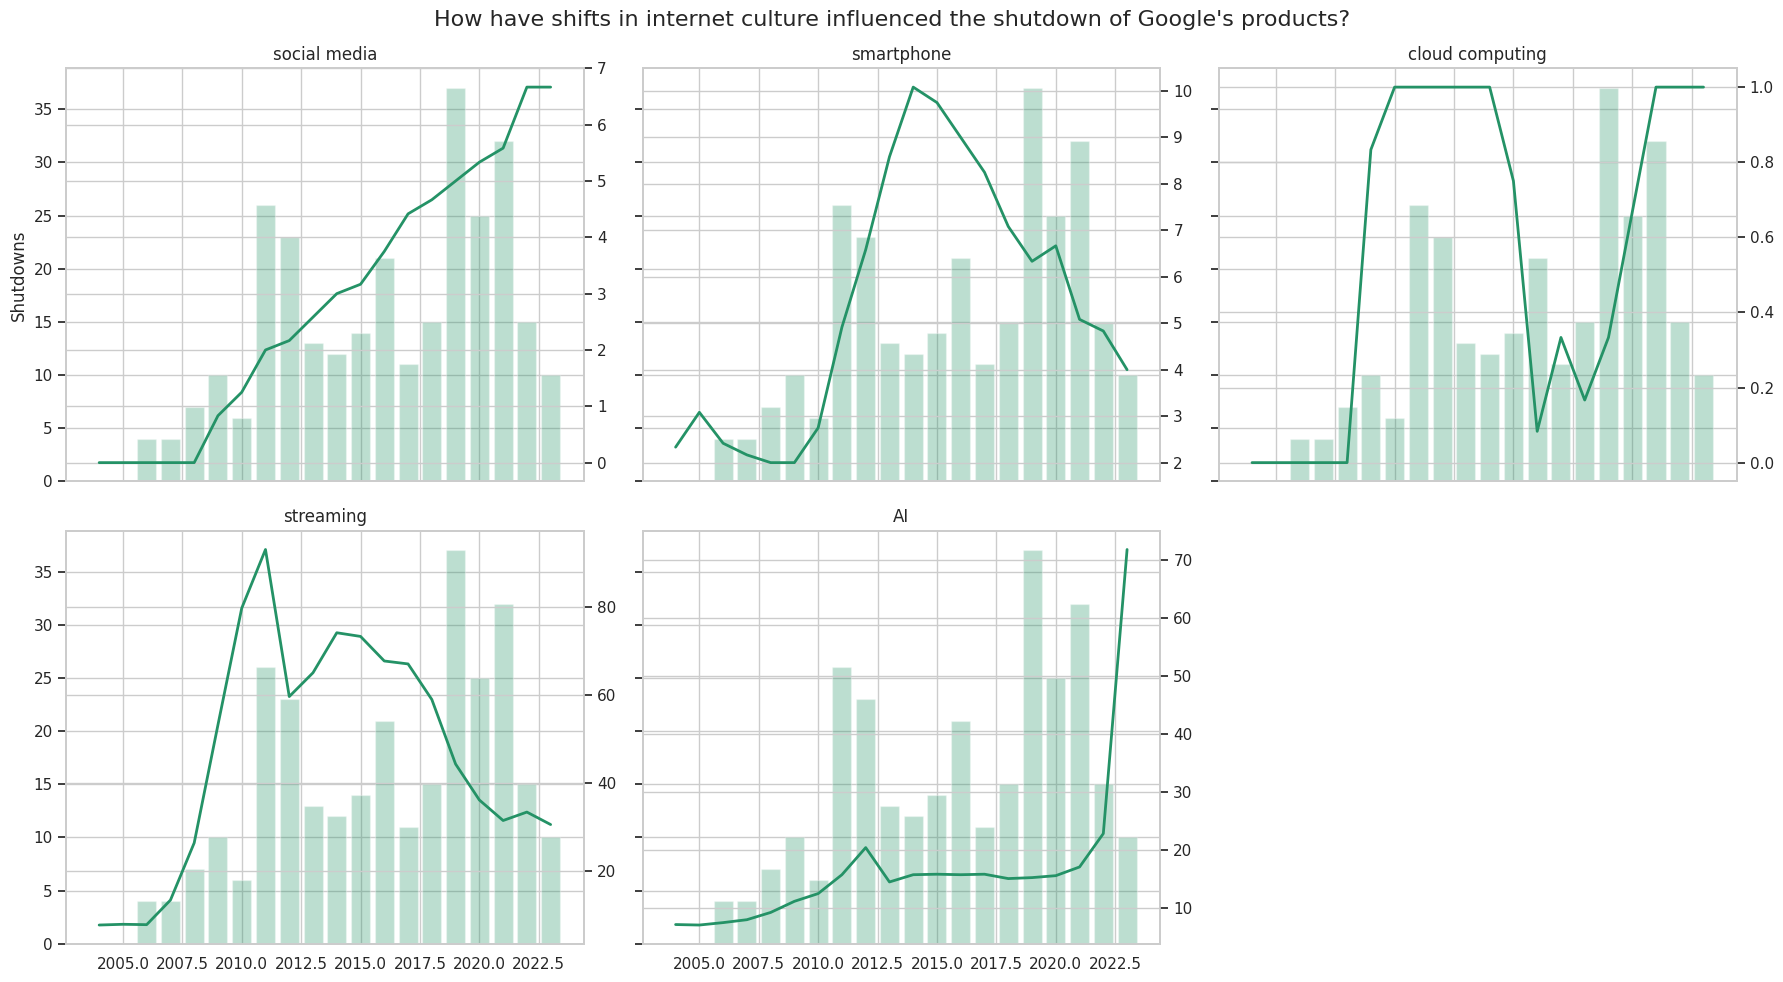

In [41]:
# Internet Culture vs Google Shutdowns
culture_cols = ["social media", "smartphone", "cloud computing", "streaming", "AI"]

fig, axes = plt.subplots(
    2, 3,
    figsize=(18,10),
    sharex=True,
    sharey=True
)

axes = axes.flatten()

for ax, col in zip(axes, culture_cols):

    ax.bar(
        merged["year"],
        merged["shutdown_count"],
        alpha=0.3,
    )

    ax.set_title(col)

    ax2 = ax.twinx()
    ax2.plot(
        merged["year"],
        merged[col],
        linewidth=2
    )

# remove unused subplot (6th box)
fig.delaxes(axes[-1])

axes[0].set_ylabel("Shutdowns")

plt.suptitle("How have shifts in internet culture influenced the shutdown of Google's products?", fontsize=16)
plt.tight_layout()
plt.show()


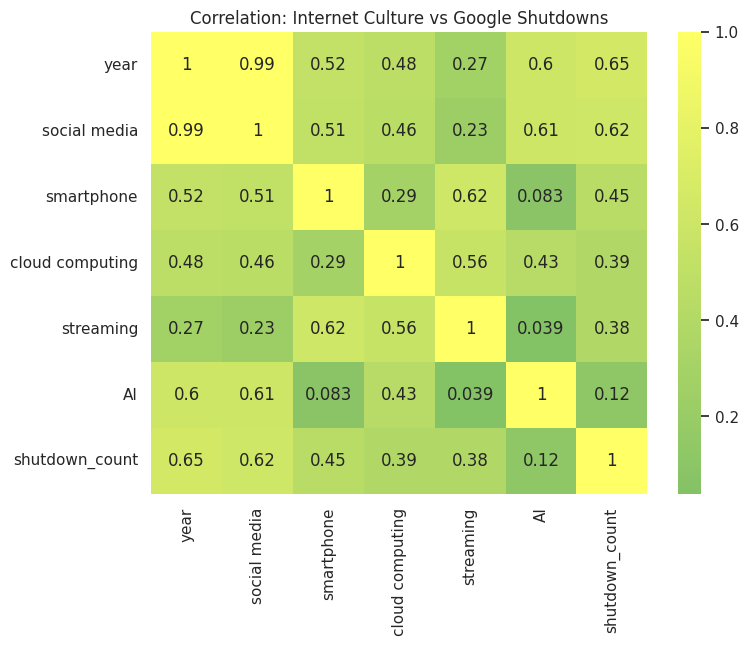

In [42]:
corr_matrix = merged.corr(numeric_only=True)

plt.figure(figsize=(8,6))

sns.heatmap(
    corr_matrix,
    annot=True,
    center=0,
    cmap="summer",
)

plt.title("Correlation: Internet Culture vs Google Shutdowns")
plt.show()
